# Social Network Ads

## About Dataset
#### 1. The Dataset used in these models tells about whether a person of certain age having certain income purchases a product or not
#### 2. We need to predict whether a person will purchase the product or not.

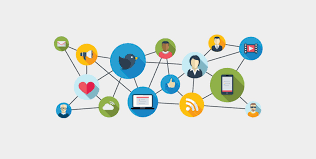

## 1.Import the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 2.Read the Dataset

In [3]:
d=pd.read_csv('social_network_ads.csv')

In [4]:
d

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## Preparing Data
### - Shape attribute
### - Information of Data
### - Top 5rows
### - Last 5 rows
### - Statiscal Information
### - Colunms names

In [5]:
d.shape

(400, 5)

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
d.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
d.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [9]:
d.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [10]:
d.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')



### Check datatypes

In [11]:
d.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

## EDA

In [12]:
d.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [13]:
d['Purchased'].unique()

array([0, 1], dtype=int64)

In [14]:
d1=d.copy()
d1

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [15]:
d1['EstimatedSalary']=d['EstimatedSalary']*d['Purchased']
d1['EstimatedSalary']

0          0
1          0
2          0
3          0
4          0
       ...  
395    41000
396    23000
397    20000
398        0
399    36000
Name: EstimatedSalary, Length: 400, dtype: int64

In [16]:
d2=d.copy()
d2=d2.pivot_table('Purchased',columns='Age',aggfunc='sum')
d2

Age,18,19,20,21,22,23,24,25,26,27,...,51,52,53,54,55,56,57,58,59,60
Purchased,0,0,0,0,0,0,0,0,0,2,...,2,5,5,4,3,3,5,6,5,7


## Data Visualization

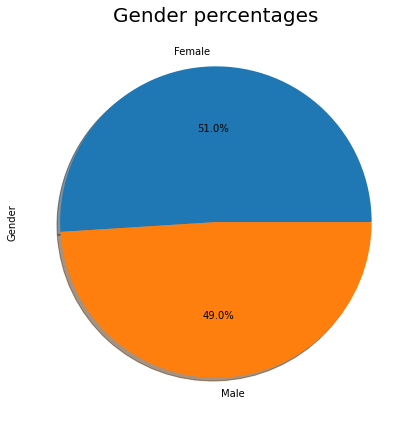

In [17]:
d['Gender'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(6,6))
plt.title('Gender percentages', fontsize = 20)
plt.tight_layout()
plt.show()


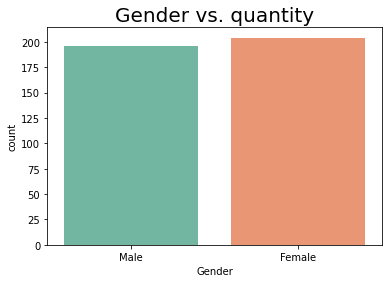

In [18]:
sns.countplot(d['Gender'], palette = 'Set2')
plt.title ('Gender vs. quantity', fontsize = 20)
plt.show()


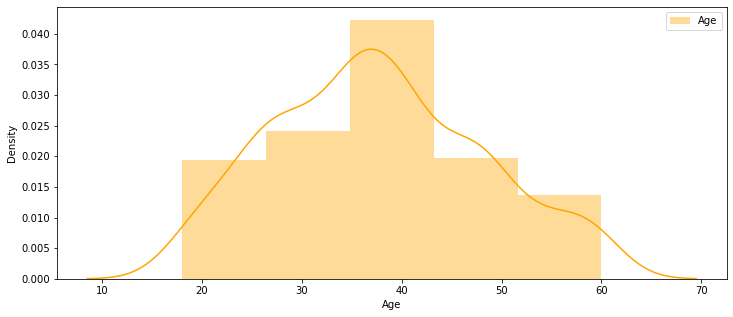

In [19]:
sns.distplot(d['Age'], bins = 5, color = 'orange',label='Age')
plt.legend()
plt.gcf().set_size_inches(12, 5)


### Conclusion:
#### Age is normally distributed around 37 years, and most of the people studied are from 35 to 45 years

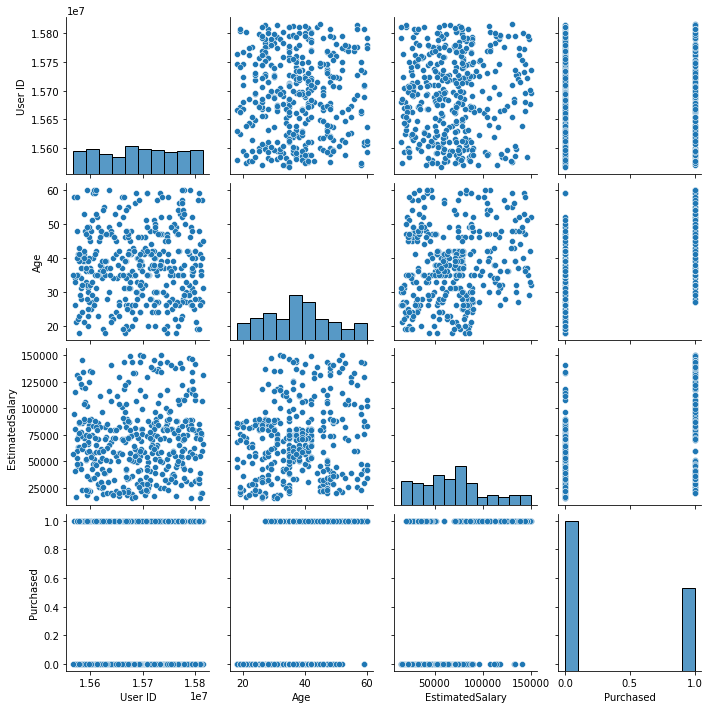

In [20]:
sns.pairplot(d)

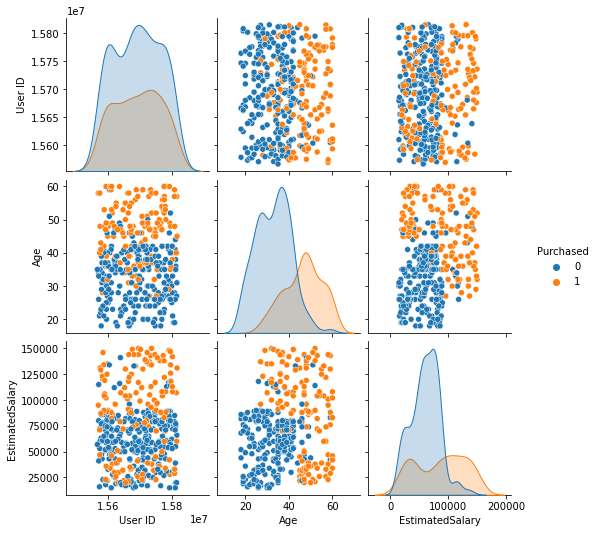

In [21]:

sns.pairplot(d,hue="Purchased")

<AxesSubplot:xlabel='Age', ylabel='Count'>

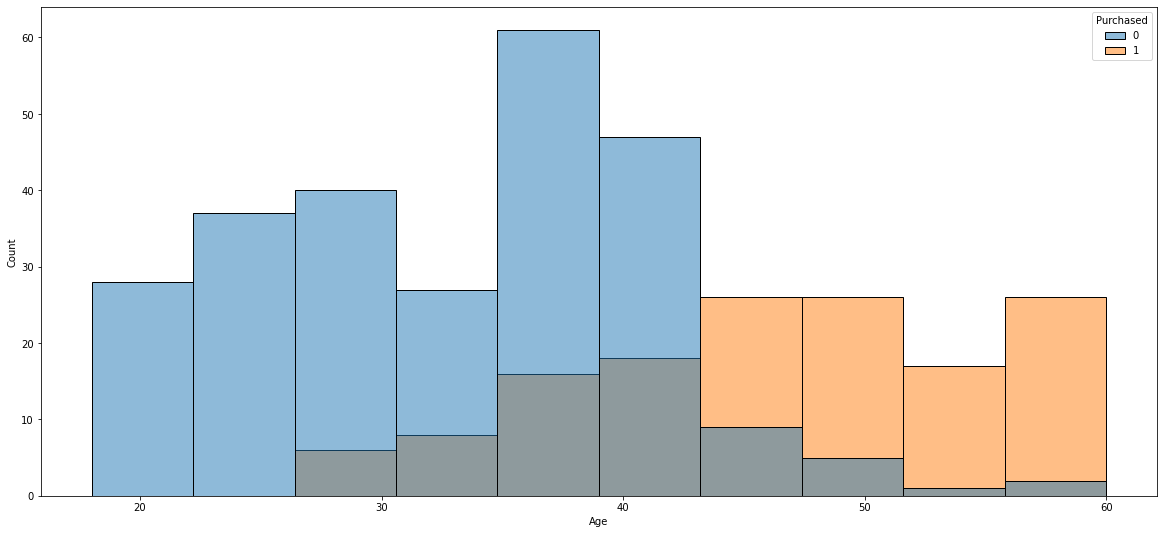

In [22]:


plt.figure(figsize=[20,9])
sns.histplot(x='Age', hue='Purchased',color='red',data=d)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

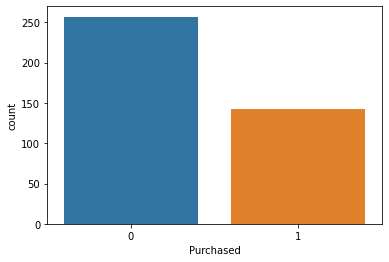

In [23]:
sns.countplot(x='Purchased',data=d)

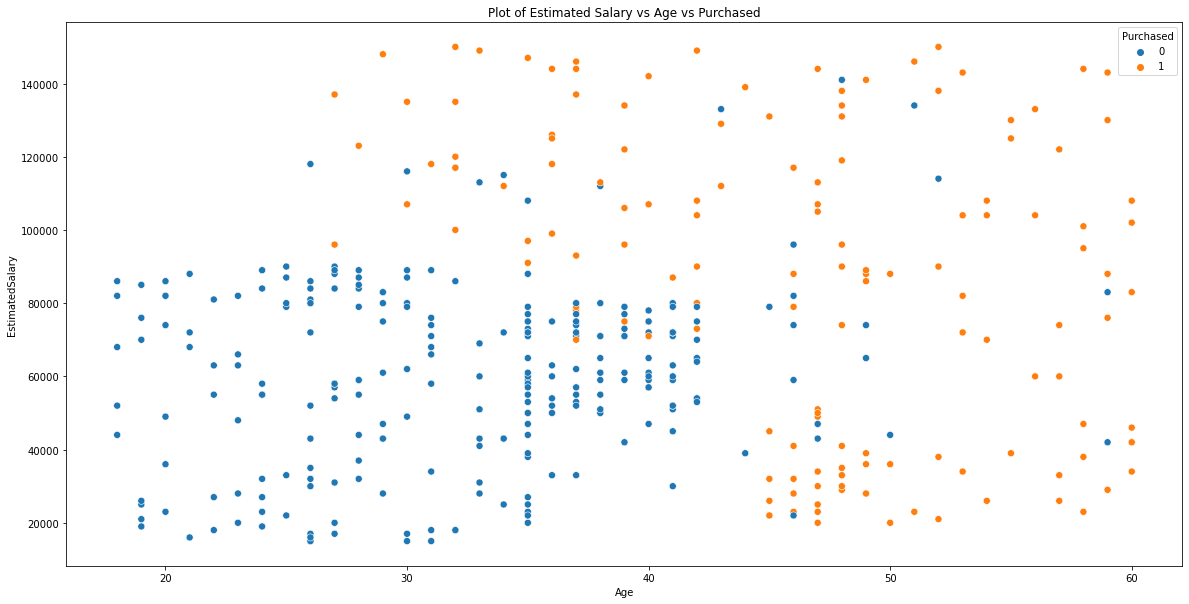

In [24]:
plt.figure(figsize=(20,10))
plt.title('Plot of Estimated Salary vs Age vs Purchased')
sns.scatterplot(data=d,x='Age',y= 'EstimatedSalary', hue='Purchased', s=50);

## Cleaning the data

### Check null value

In [25]:
d.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [26]:
d.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [27]:
d.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [28]:
d.drop(['User ID','Gender'],axis=1,inplace=True)

In [29]:
d

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## Machine Learning
#####  It is a type of artificial intelligence (AI) that allows software applications to become more accurate at predicting outcomes without being explicitly programmed to do so

In [30]:
y=d.Purchased

In [31]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [32]:
x=d.drop(['Purchased'],axis=1)

In [33]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [34]:
d

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [35]:
d.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

## Random Forest Classifier
#### It is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. 

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model=RandomForestClassifier()

In [40]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
model.score(x_test,y_test)

0.8916666666666667

In [42]:
y_predict=model.predict(x_test)

In [43]:
y_predict

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

## To find Accuracy Score

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test,y_predict)

0.8916666666666667

## Plot Confusion Matrix

In [46]:
from sklearn.metrics import plot_confusion_matrix

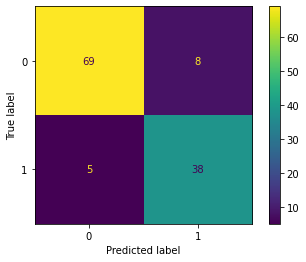

In [47]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

## Classification Report

In [48]:
from sklearn.metrics import classification_report

In [49]:
performance_report = classification_report(y_test,y_predict)

In [50]:
performance_report

'              precision    recall  f1-score   support\n\n           0       0.93      0.90      0.91        77\n           1       0.83      0.88      0.85        43\n\n    accuracy                           0.89       120\n   macro avg       0.88      0.89      0.88       120\nweighted avg       0.89      0.89      0.89       120\n'

## Logistic Regression
##### It is used to calculate or predict the probability of a binary (yes/no) event occurring

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
model=LogisticRegression()

In [53]:
model.fit(x_train,y_train)

LogisticRegression()

In [54]:
model.score(x_test,y_test)

0.6416666666666667

In [55]:
y_predict=model.predict(x_test)

In [56]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## To find accuracy score

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_test,y_predict)

0.6416666666666667

## Plot Confusion Matrix

In [59]:
from sklearn.metrics import plot_confusion_matrix

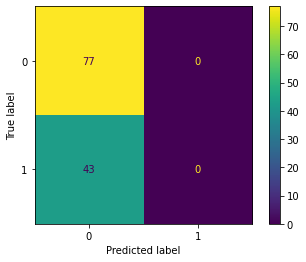

In [60]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

## Classification Report

In [61]:
from sklearn.metrics import classification_report

In [62]:
performance_report = classification_report(y_test,y_predict)

In [63]:
performance_report

'              precision    recall  f1-score   support\n\n           0       0.64      1.00      0.78        77\n           1       0.00      0.00      0.00        43\n\n    accuracy                           0.64       120\n   macro avg       0.32      0.50      0.39       120\nweighted avg       0.41      0.64      0.50       120\n'

## Decision Tree Classifier
#### A decision tree is a very specific type of probability tree that enables you to make a decision about some kind of process.

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
model=DecisionTreeClassifier()

In [66]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
model.score(x_test,y_test)

0.875

In [68]:
y_predict=model.predict(x_test)

In [69]:
y_predict

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

## SVM
####


In [70]:
from sklearn.svm import SVC

In [71]:
model=SVC()

In [72]:
model.fit(x_train,y_train)

SVC()

In [73]:
model.score(x_test,y_test)

0.75

### Confusion Matrix

In [74]:
from sklearn.metrics import plot_confusion_matrix

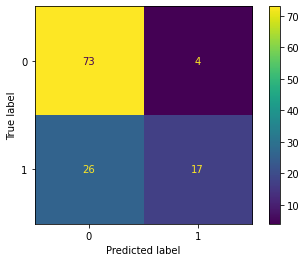

In [75]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [76]:
y_predict=model.predict(x_test)

In [77]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(y_test,y_predict)

0.75

In [80]:
model_g=SVC(gamma='scale')

In [81]:
model_g.fit(x,y)

SVC()

In [82]:
model_g.score(x_test,y_test)

0.7583333333333333

In [83]:
model_g1=SVC(gamma='auto')

In [84]:
model_g1.fit(x,y)

SVC(gamma='auto')

In [85]:
model_g1.score(x_test,y_test)

0.9833333333333333

In [86]:
model_k=SVC(kernel='rbf')

In [87]:
model_k.fit(x,y)

SVC()

In [88]:
model_k.score(x_test,y_test)

0.7583333333333333

## XG Booster

In [89]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [90]:
import xgboost as xgb

In [91]:
model_xgb=xgb.XGBClassifier()

In [92]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [93]:
model_xgb.score(x_test,y_test)

0.8833333333333333

In [94]:
y_predict=model_xgb.predict(x_test)

In [95]:
y_predict

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
performance=confusion_matrix(y_test,y_predict)

In [98]:
performance

array([[68,  9],
       [ 5, 38]], dtype=int64)

In [99]:
p={'objective':'binary:logistic','max_depth':4,'alpha':10,'learning_rate':1,'n_estimators':100}

In [100]:
xg_model=xgb.XGBClassifier(**p)

In [101]:
xg_model

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, ...)

In [102]:
 xg_model.fit(x_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learning_rate=1,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=4,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)

In [103]:
xg_model.score(x_test,y_test)

0.9166666666666666

In [104]:
y_predict=xg_model.predict(x_test)
y_predict

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [105]:
from sklearn.metrics import accuracy_score

In [107]:
accuracy_score(y_test,y_predict)

0.9166666666666666

In [108]:
from sklearn.metrics import confusion_matrix

In [109]:
perform=confusion_matrix(y_test,y_predict)

In [110]:
perform

array([[72,  5],
       [ 5, 38]], dtype=int64)

In [111]:
from sklearn.metrics import plot_confusion_matrix

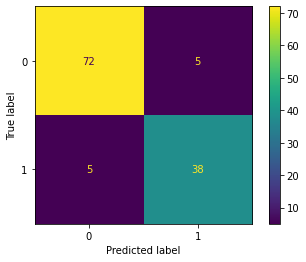

In [115]:
plot_confusion_matrix(xg_model,x_test,y_test)
plt.show()

In [113]:
from sklearn.metrics import classification_report

In [114]:
performance_report=classification_report(y_test,y_predict)

In [116]:
print(performance_report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.88      0.88      0.88        43

    accuracy                           0.92       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



### Conclusion:
#### Random Forest classifier, Decision tree classifier, SVC and XG booster all reach a better accuracy than logistic regression.